# MASINSKO UCENJE PRVI PROJEKAT
---
*Nada Jovanovic 1618*    
*Milica Jovanovic 1636*  



 ## Import
 ___

In [145]:
from matplotlib import pyplot
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, auc
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

## Dataset
___
Dataset ukupno ima 16 fičera i to:  
- 3 kategorička
- 3 numerička
- 10 binarna

| Name  | Feature Type | Description  | Values  |
|---|---|---|---|
|Diagnosis|Feature	Categorical|specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any| from DGN1 to DGN8|
|PRE7  | Feature	Binary  |  Pain before surgery | (T,F)   |
|PRE4  | Feature	Continuous  | Forced vital capacity - FVC  |   (numeric) |
|PRE5 | Feature	Continuous  | Volume that has been exhaled at the end of the first second of forced expiration - FEV1   |(numeric)|
|PRE6|Feature	Categorical  |  Performance status - Zubrod scale | (PRZ2,PRZ1,PRZ0)  |
|PRE7|Feature	Binary  |  Pain before surgery |   (T,F)   |
|PRE8|Feature	Binary  | Haemoptysis before surgery  |  (T,F) |
|PRE9|Feature	Binary  | Dyspnoea before surgery  | (T,F)  |
|PRE10|Feature	Binary|Cough before surgery|(T,F)|
|PRE11|Feature	Binary|Weakness before surgery|(T,F)|
|PRE14|Feature	Categorical|T in clinical TNM - size of the original tumour|from OC11 (smallest) to OC14 (largest)|
|PRE17|Feature	Binary|Type 2 DM - diabetes mellitus|(T,F)|
|PRE19|Feature	Binary|MI up to 6 months|(T,F)|
|PRE25|Feature	Binary|PAD - peripheral arterial diseases|(T,F)|
|PRE30|Feature	Binary|Smoking|(T,F)|
|PRE32|Feature	Binary|Asthma|(T,F)|
|AGE|Feature	Integer|Age	Age at surgery|(numeric)|
|**Risk1Yr**|**Target	Binary**|**1 year survival period - (T)rue value if died**|**(T,F)** |	  
	  


In [105]:
data = pd.read_csv("data.csv")
data1 = pd.read_csv("data.csv")
data.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


### Vizuelni prikaz podataka

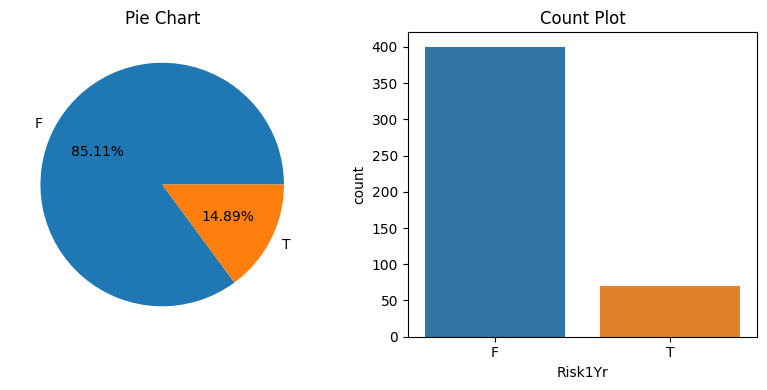

Risk1Yr
F    400
T     70
Name: count, dtype: int64

In [106]:
fig, axes = pyplot.subplots(1, 2, figsize=(8, 4))

axes[0].pie(data['Risk1Yr'].value_counts(), labels=['F', 'T'], autopct='%1.2f%%')
axes[0].set_title('Pie Chart')

sns.countplot(x="Risk1Yr", data=data, ax=axes[1], order=['F', 'T'], hue_order=['F', 'T'], hue="Risk1Yr", legend=False)
axes[1].set_title('Count Plot')

pyplot.tight_layout()
pyplot.show()

data['Risk1Yr'].value_counts()

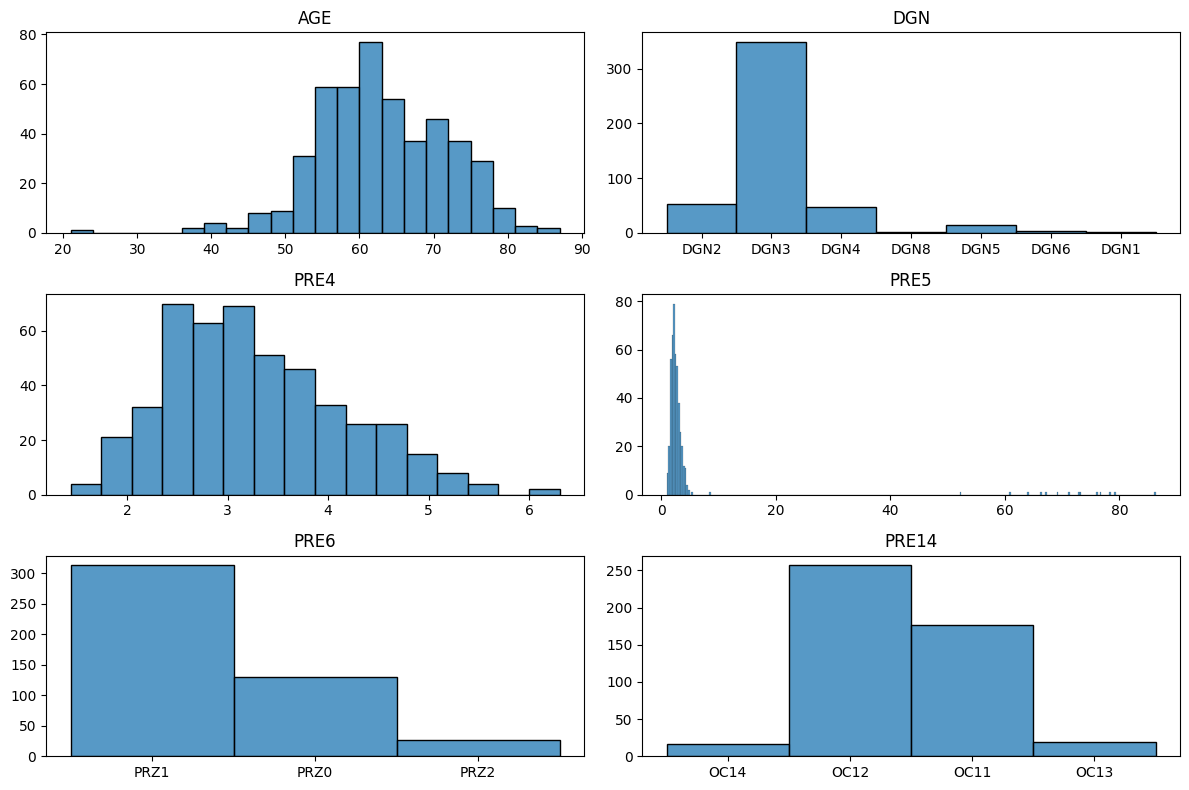

In [107]:
columns = ['AGE', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE14']

fig, axes = pyplot.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

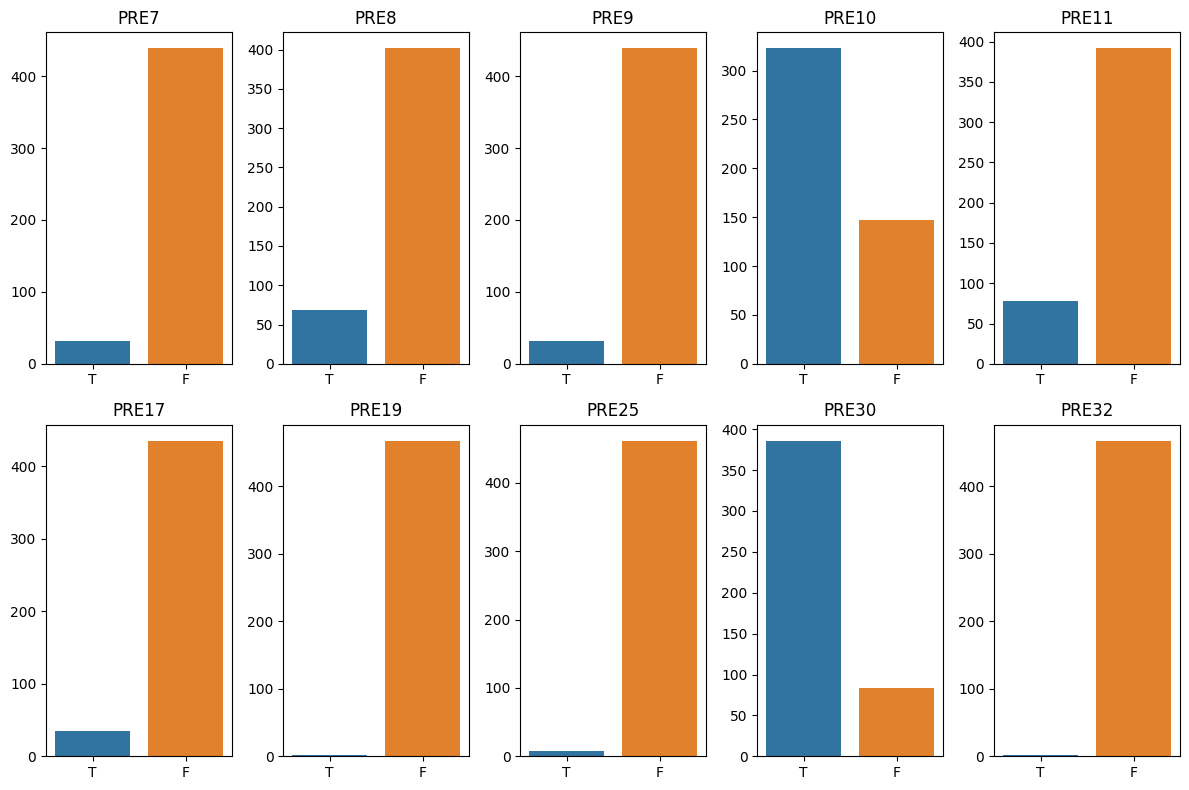

In [108]:
columns_bin = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25','PRE30','PRE32']

fig, axes = pyplot.subplots(2, 5, figsize=(12, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns_bin):
    sns.countplot(x=column_name, data=data, ax=axes[i], order=['T', 'F'], hue_order=['T', 'F'], hue=column_name, legend=False)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()


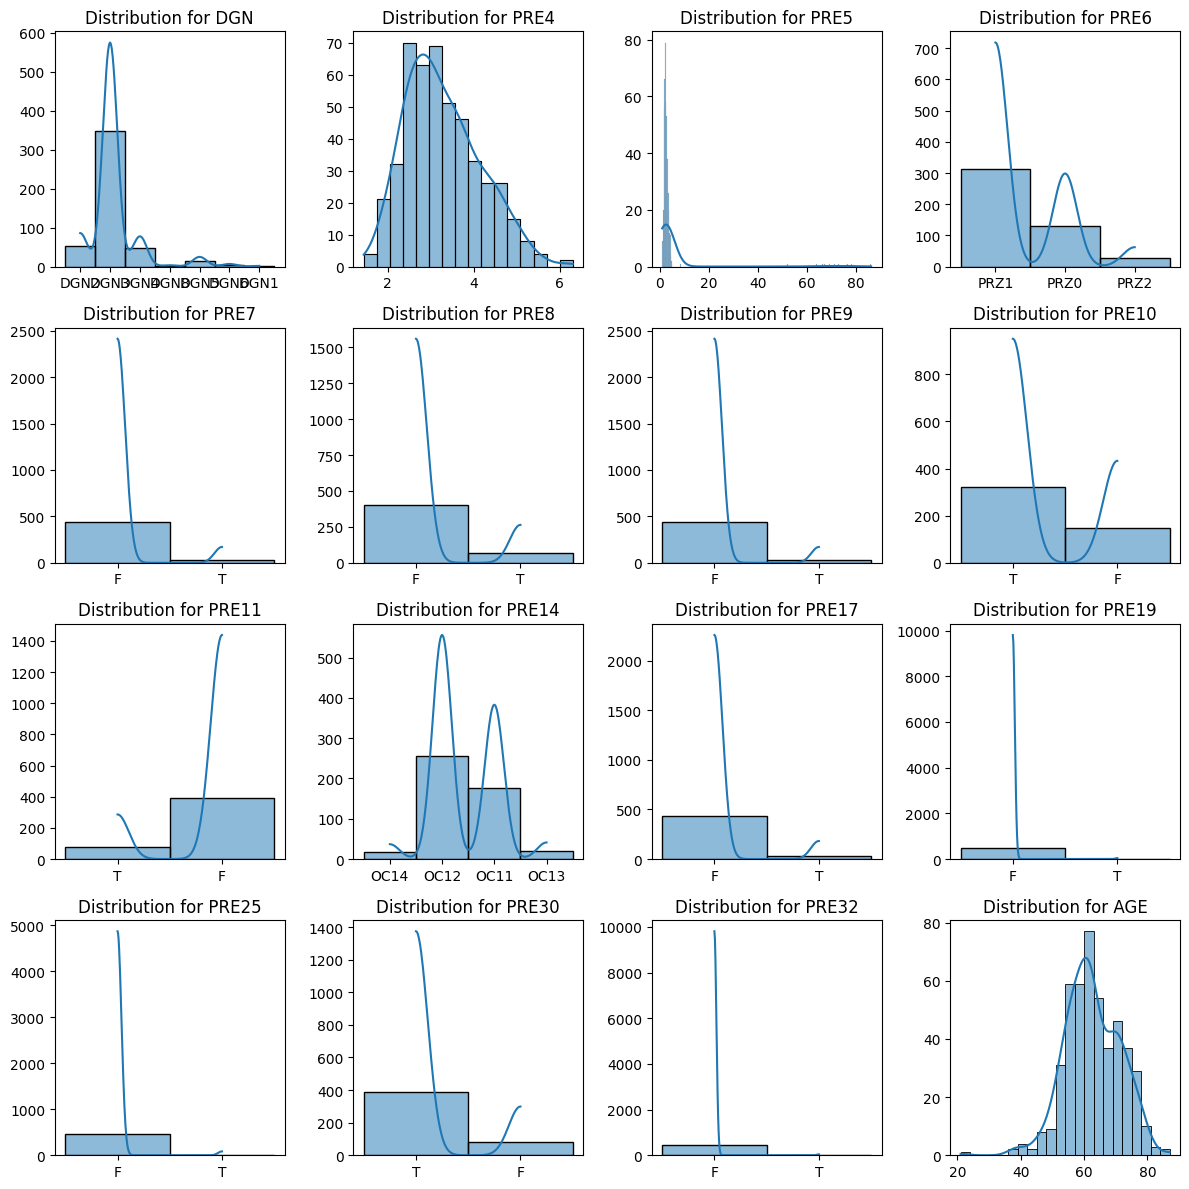

In [109]:
fig, axes = pyplot.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    sns.histplot(x=column, data=data, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution for {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

### Vizuelni prikaz u odnusu na target 

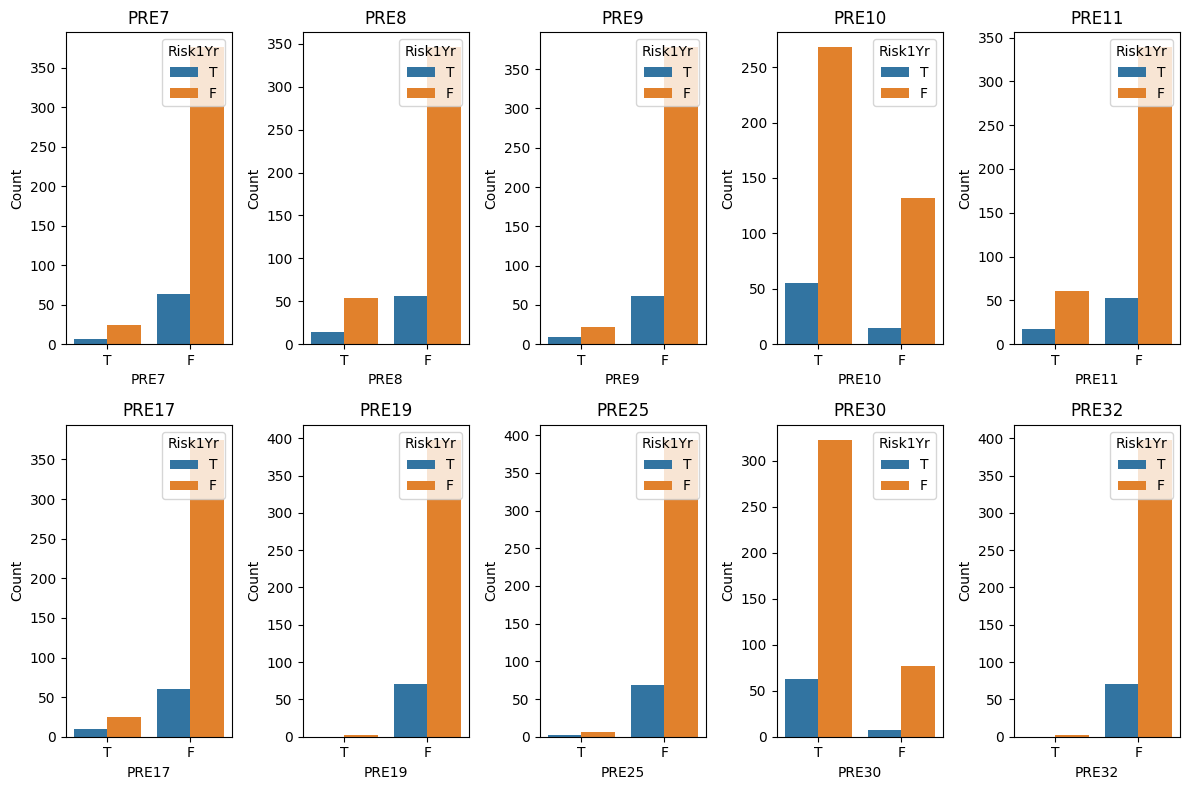

In [110]:
fig, axes = pyplot.subplots(2, 5, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(columns_bin): 
    sns.countplot(x=column, hue='Risk1Yr', data=data, ax=axes[i], order=['T', 'F'], hue_order=['T', 'F'])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Risk1Yr', loc='upper right')

pyplot.tight_layout()
pyplot.show()


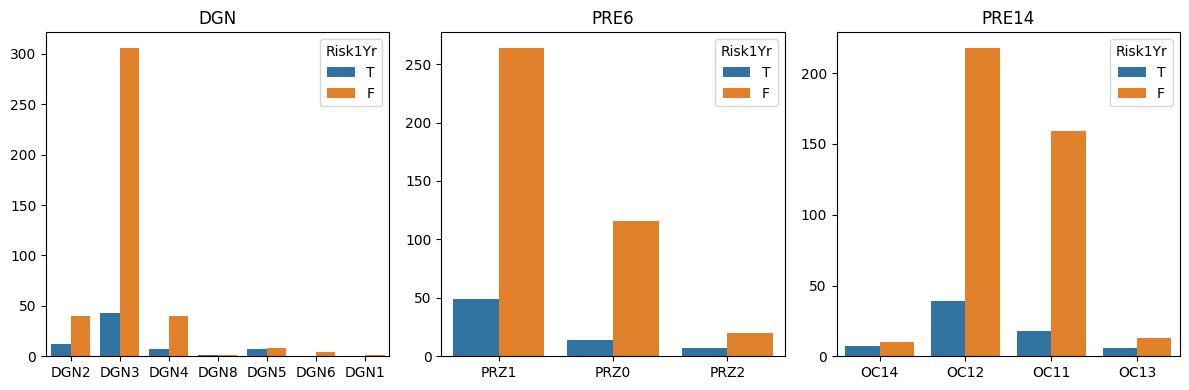

In [111]:
columns_cat = ['DGN', 'PRE6', 'PRE14']

fig, axes = pyplot.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns_cat):
    sns.countplot(x=column_name,  hue='Risk1Yr', data=data, ax=axes[i], hue_order=['T', 'F'])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

In [112]:
# data1 = data1.drop(columns=['PRE32', 'PRE19', 'PRE25'])
# data1

## Transforamcija podataka

Provera da li postoje duplikati u datasetu.

In [113]:
print("Number Of Rows In The Original DataFrame:", len(data))
print("Number Of Rows After Deduping:", len(data.drop_duplicates()))

Number Of Rows In The Original DataFrame: 470
Number Of Rows After Deduping: 470


In [114]:
data.info()
data.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.6+ KB


,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470,470.000000,470.000000,470,470,470,470,470,470,470,470,470,470,470,470,470.000000,470
unique,7,NaN,NaN,3,2,2,2,2,2,4,2,2,2,2,2,NaN,2
top,DGN3,NaN,NaN,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,NaN,F
freq,349,NaN,NaN,313,439,402,439,323,392,257,435,468,462,386,468,NaN,400
mean,NaN,3.281638,4.568702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.534043,NaN
std,NaN,0.871395,11.767857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.706902,NaN
min,NaN,1.440000,0.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN
25%,NaN,2.600000,1.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN
50%,NaN,3.160000,2.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,NaN
75%,NaN,3.807500,3.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN


Kao što se vidi iz priloženog, potrebno transformisati 14 kolona.  

Transforamcije se vrši korišćenjem **pandas** biblioteke tačnije uz pomoć funkcija `get_dummies` i `replace`

In [115]:
labels = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17','PRE30','Risk1Yr','PRE32', 'PRE19', 'PRE25']
data2 = pd.get_dummies(data=data1, columns=['DGN'], dtype=int)

data2 = pd.get_dummies(data=data2, columns=labels, drop_first=True)

scale_mapper = {'OC11':1,
 'OC12':2,
 'OC13':3,
 'OC14':4 }

data2["PRE14"] = data2["PRE14"].replace(scale_mapper)

scale_mapper2 = {'PRZ0':1,
 'PRZ1':2,
 'PRZ2':3}

data2["PRE6"] = data2["PRE6"].replace(scale_mapper2)
print("Izgled podataka posle transformacije:")
data2.head()


Izgled podataka posle transformacije:


,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,...,PRE8_T,PRE9_T,PRE10_T,PRE11_T,PRE17_T,PRE30_T,Risk1Yr_T,PRE32_T,PRE19_T,PRE25_T
0,2.88,2.16,2,4,60,0,1,0,0,0,...,False,False,True,True,False,True,False,False,False,False
1,3.40,1.88,1,2,51,0,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False
2,2.76,2.08,2,1,59,0,0,1,0,0,...,False,False,True,False,False,True,False,False,False,False
3,3.68,3.04,1,1,54,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2.44,0.96,3,1,73,0,0,1,0,0,...,True,False,True,True,False,True,True,False,False,False


In [116]:
data2.info()
data2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRE4       470 non-null    float64
 1   PRE5       470 non-null    float64
 2   PRE6       470 non-null    int64  
 3   PRE14      470 non-null    int64  
 4   AGE        470 non-null    int64  
 5   DGN_DGN1   470 non-null    int32  
 6   DGN_DGN2   470 non-null    int32  
 7   DGN_DGN3   470 non-null    int32  
 8   DGN_DGN4   470 non-null    int32  
 9   DGN_DGN5   470 non-null    int32  
 10  DGN_DGN6   470 non-null    int32  
 11  DGN_DGN8   470 non-null    int32  
 12  PRE7_T     470 non-null    bool   
 13  PRE8_T     470 non-null    bool   
 14  PRE9_T     470 non-null    bool   
 15  PRE10_T    470 non-null    bool   
 16  PRE11_T    470 non-null    bool   
 17  PRE17_T    470 non-null    bool   
 18  PRE30_T    470 non-null    bool   
 19  Risk1Yr_T  470 non-null    bool   
 20  PRE32_T   

,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.00000,470.000000,470.000000,470.000000
mean,3.281638,4.568702,1.780851,1.736170,62.534043,0.002128,0.110638,0.742553,0.10000,0.031915,0.008511,0.004255
std,0.871395,11.767857,0.535375,0.702243,8.706902,0.046127,0.314018,0.437693,0.30032,0.175961,0.091958,0.065163
min,1.440000,0.960000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.600000,1.960000,1.000000,1.000000,57.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3.160000,2.400000,2.000000,2.000000,62.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,3.807500,3.080000,2.000000,2.000000,69.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,6.300000,86.300000,3.000000,4.000000,87.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


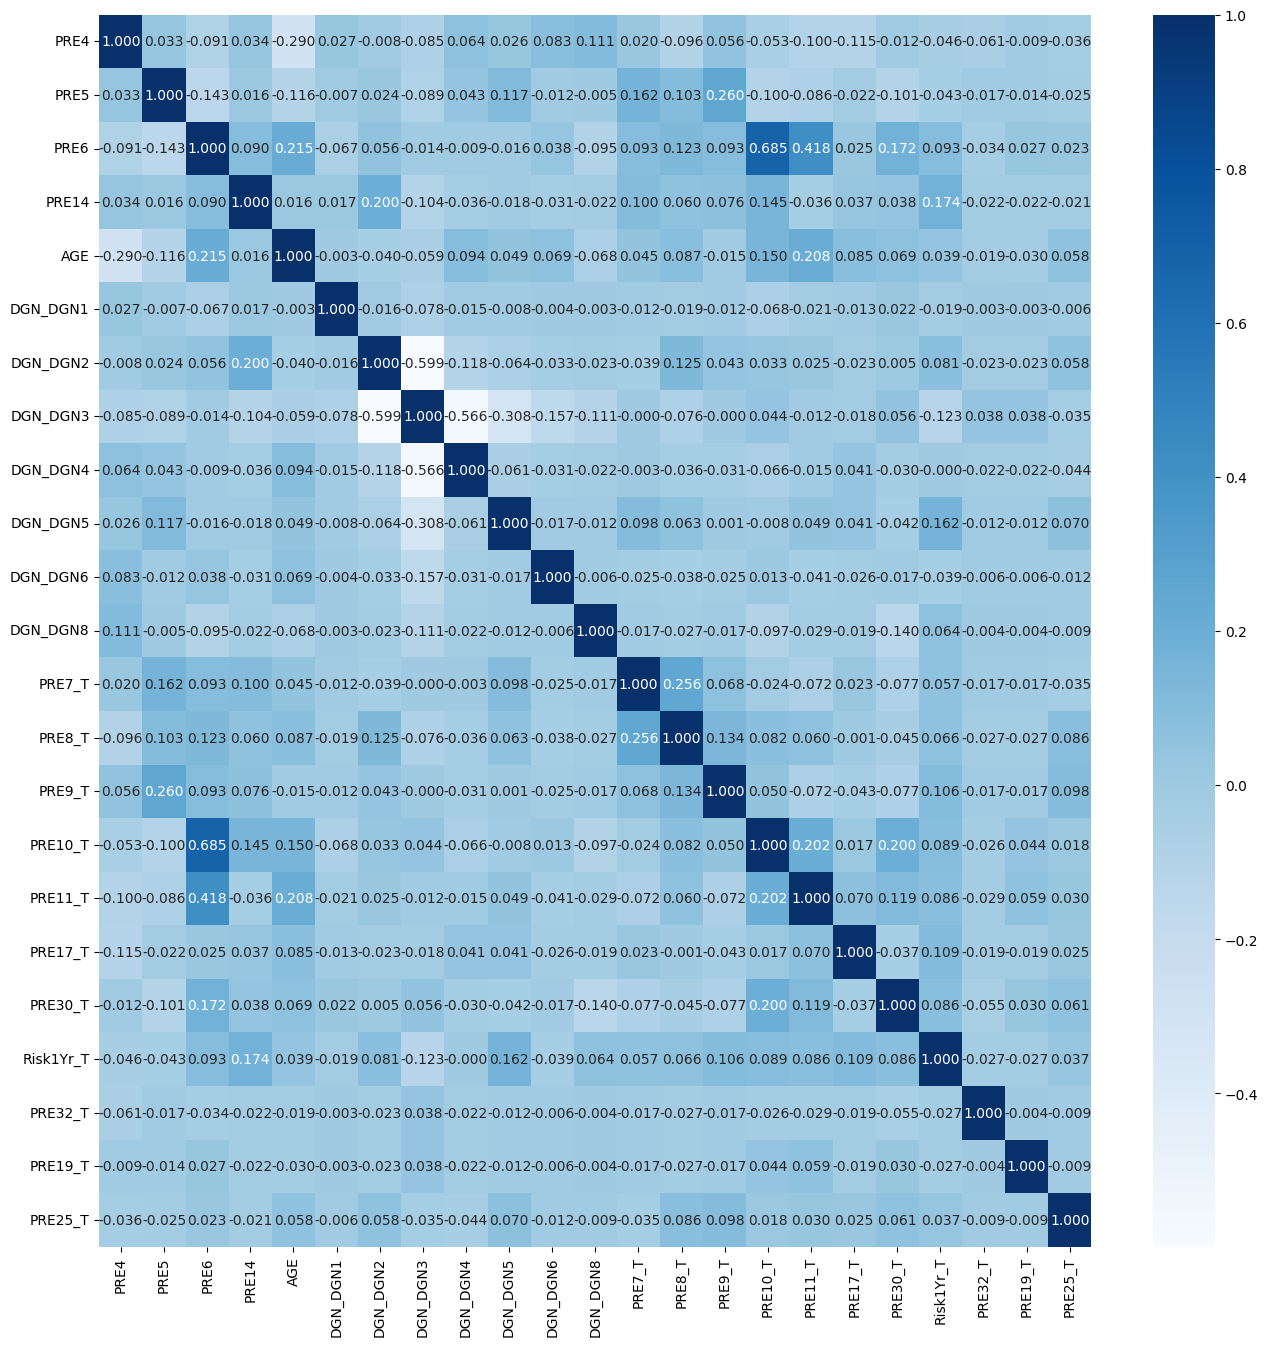

In [117]:
df_corr = data2.corr()
pyplot.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
pyplot.show()


Na osnovu korelacije nije moguće iznaciti nijednu kolonu iz dataseta. 

## Modeli pre balansiranja


In [118]:
data_features = data2.drop('Risk1Yr_T', axis=1)
target = data2['Risk1Yr_T']

print(data_features.head())



   PRE4  PRE5  PRE6  PRE14  AGE  DGN_DGN1  DGN_DGN2  DGN_DGN3  DGN_DGN4  \
0  2.88  2.16     2      4   60         0         1         0         0   
1  3.40  1.88     1      2   51         0         0         1         0   
2  2.76  2.08     2      1   59         0         0         1         0   
3  3.68  3.04     1      1   54         0         0         1         0   
4  2.44  0.96     3      1   73         0         0         1         0   

   DGN_DGN5  ...  PRE7_T  PRE8_T  PRE9_T  PRE10_T  PRE11_T  PRE17_T  PRE30_T  \
0         0  ...   False   False   False     True     True    False     True   
1         0  ...   False   False   False    False    False    False     True   
2         0  ...   False   False   False     True    False    False     True   
3         0  ...   False   False   False    False    False    False    False   
4         0  ...   False    True   False     True     True    False     True   

   PRE32_T  PRE19_T  PRE25_T  
0    False    False    False  
1    F

In [119]:

scaler = StandardScaler()
scale_cols = ['AGE', 'PRE4', 'PRE5']
data_features[scale_cols] = scaler.fit_transform(data_features[scale_cols])
data_features.head()

,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,...,PRE7_T,PRE8_T,PRE9_T,PRE10_T,PRE11_T,PRE17_T,PRE30_T,PRE32_T,PRE19_T,PRE25_T
0,-0.461405,-0.204903,2,4,-0.291348,0,1,0,0,0,...,False,False,False,True,True,False,True,False,False,False
1,0.135975,-0.228722,1,2,-1.326113,0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
2,-0.599262,-0.211708,2,1,-0.406322,0,0,1,0,0,...,False,False,False,True,False,False,True,False,False,False
3,0.457641,-0.130043,1,1,-0.981191,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,-0.966881,-0.306984,3,1,1.203311,0,0,1,0,0,...,False,True,False,True,True,False,True,False,False,False


In [120]:

results = {
    'KNN': {
    },
    'Random Forest': {
    },
    'Logistic Regression':{
    },
    "LinearSVC":{
    },
    "BernoulliNB":{
    },
    'DecisionTree':{
    },
    'XGBoost':{
    }
}

In [121]:

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=42)

print(f"Broj uzoraka u trening skupu podataka: {len(data_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(data_test)}")



Broj uzoraka u trening skupu podataka: 376
Broj uzoraka u test skupu podataka: 94


In [122]:
def score(target_test, model_pred, model):
    accuracy = accuracy_score(target_test, model_pred)
    f1 = f1_score(target_test, model_pred)
    precision = precision_score(target_test, model_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_true=target_test, y_pred=model_pred)
    TN, FP, FN, TP = conf_matrix.ravel()

    print(model)
    print("--------------------------------------")
    print("Accuracy :", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    pyplot.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
    pyplot.xlabel('Predicted')
    pyplot.ylabel('Actual')
    pyplot.title('Confusion Matrix')
    pyplot.show()
    print("True negative: ", TN)
    print("False negative: ", FN)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("--------------------------------------")

    return accuracy

def roc_plot(model_pred, model_names, target_test, atribut):
    pyplot.figure(figsize=(10, 8))

    for model, name in zip(model_pred, model_names):       
        fpr, tpr, _ = roc_curve(target_test, model)
        roc_auc = auc(fpr, tpr)
        pyplot.plot(fpr, tpr, label=f'{name} {atribut}(AUC = {roc_auc:.3f})')

    pyplot.plot([0, 1], [0, 1], linestyle='--', color='gray')

    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title('Receiver Operating Characteristic (ROC) Curves')
    pyplot.legend()

    pyplot.show()

Funkcija za kros validaciju modela:

In [123]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

def cv_results(model_name, model, data_features, target, cv):
    cv_results = cross_validate(model, data_features, target, cv=cv, scoring='accuracy')
    mean = np.mean(cv_results['test_score'])
    print(f"{model_name} cross validation accuracy: ", cv_results['test_score'], "------> mean:", mean) 
    print("--------------------------------------")
    return mean


### Random Forest

Random Forest
--------------------------------------
Accuracy : 0.7978723404255319
F1 Score:  0.0
Precision:  1.0


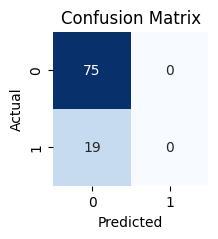

True negative:  75
False negative:  19
True positive:  0
False positive:  0
--------------------------------------


Random Forest cross validation accuracy:  [0.87234043 0.82978723 0.78723404 0.87234043 0.95744681 0.78723404
 0.87234043 0.72340426 0.85106383 0.91489362] ------> mean: 0.8468085106382979
--------------------------------------


In [124]:
rf_classifier = RandomForestClassifier()

rf_model = rf_classifier.fit(data_train, target_train)
rf_pred = rf_model.predict(data_test)

results['Random Forest']['basic'] = score(target_test, rf_pred, "Random Forest")
results['Random Forest']['cross'] =  cv_results("Random Forest", rf_classifier, data_features, target, kfold)


Random Forest Cross Validate
--------------------------------------
Accuracy : 0.8085106382978723
F1 Score:  0.25
Precision:  0.6


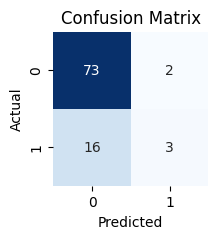

True negative:  73
False negative:  16
True positive:  3
False positive:  2
--------------------------------------


0.8085106382978723

In [125]:
rf_pred_cv = cross_val_predict(rf_model, data_test, target_test, cv=kfold)
score(target_test, rf_pred_cv, "Random Forest Cross Validate")

### K-Nearest Neighbors


KNN
--------------------------------------
Accuracy : 0.7978723404255319
F1 Score:  0.0
Precision:  1.0


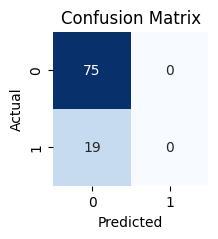

True negative:  75
False negative:  19
True positive:  0
False positive:  0
--------------------------------------


KNN cross validation accuracy:  [0.87234043 0.82978723 0.78723404 0.89361702 0.9787234  0.78723404
 0.89361702 0.72340426 0.82978723 0.89361702] ------> mean: 0.848936170212766
--------------------------------------


In [126]:

from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=8)

knn_model = nearest_neighbors.fit(data_train,target_train)

predNN = knn_model.predict(data_test)

results['KNN']['basic'] = score(target_test, predNN, "KNN")
results['KNN']['cross'] =  cv_results("KNN", nearest_neighbors,data_features, target, kfold)


### Logistic Regression

Logistic Regression


--------------------------------------
Accuracy : 0.7978723404255319
F1 Score:  0.0
Precision:  1.0


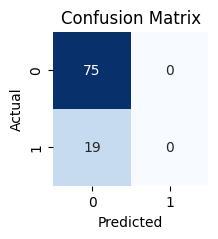

True negative:  75
False negative:  19
True positive:  0
False positive:  0
--------------------------------------
Logistic Regression cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.89361702 0.93617021 0.74468085
 0.89361702 0.74468085 0.85106383 0.91489362] ------> mean: 0.8446808510638298
--------------------------------------


In [127]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)

lr_model = logistic_regression.fit(data_train, target_train)

pred_lr = lr_model.predict(data_test)

results['Logistic Regression']['basic'] = score(target_test, pred_lr, "Logistic Regression")
results['Logistic Regression']['cross'] =  cv_results("Logistic Regression", logistic_regression,data_features, target, kfold)


### LinearSVC

LinearSVC
--------------------------------------
Accuracy : 0.7872340425531915
F1 Score:  0.09090909090909091
Precision:  0.3333333333333333


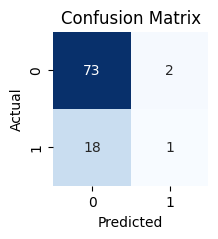

True negative:  73
False negative:  18
True positive:  1
False positive:  2
--------------------------------------
LinearSVC cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.87234043 0.95744681 0.74468085
 0.87234043 0.74468085 0.87234043 0.91489362] ------> mean: 0.8446808510638297
--------------------------------------


In [128]:
svc_model = LinearSVC( C=1.0, random_state=0,  dual='auto')

pred = svc_model.fit(data_train, target_train).predict(data_test)

results['LinearSVC']['basic'] = score(target_test, pred, "LinearSVC")
results['LinearSVC']['cross'] =  cv_results("LinearSVC", svc_model,data_features, target, kfold)


### Naive Bayes


BernoulliNB
--------------------------------------
Accuracy : 0.8085106382978723
F1 Score:  0.1
Precision:  1.0


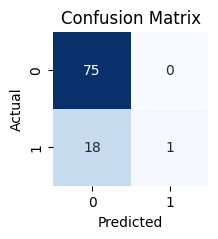

True negative:  75
False negative:  18
True positive:  1
False positive:  0
--------------------------------------
BernoulliNB cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.85106383 0.9787234  0.74468085
 0.87234043 0.72340426 0.85106383 0.91489362] ------> mean: 0.8404255319148936
--------------------------------------


In [129]:
nb_classifer = BernoulliNB()

model = nb_classifer.fit(data_train, target_train)
pred = model.predict(data_test)

results['BernoulliNB']['basic'] = score(target_test, pred,"BernoulliNB" )
results['BernoulliNB']['cross'] =  cv_results("BernoulliNB", model,data_features, target, kfold)



### DecisionTreeClassifier

DecisionTree
--------------------------------------
Accuracy : 0.7021276595744681
F1 Score:  0.125
Precision:  0.15384615384615385


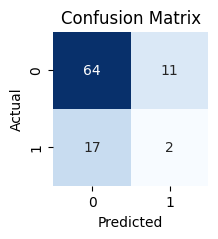

True negative:  64
False negative:  17
True positive:  2
False positive:  11
--------------------------------------
DecisionTree cross validation accuracy:  [0.76595745 0.70212766 0.78723404 0.78723404 0.85106383 0.68085106
 0.78723404 0.70212766 0.80851064 0.80851064] ------> mean: 0.7680851063829788
--------------------------------------


In [130]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

results['DecisionTree']['basic'] = score(target_test, predDT,"DecisionTree")
results['DecisionTree']['cross'] =  cv_results("DecisionTree", decisionTree,data_features, target, kfold)


### XGBoost 

XGBoost
--------------------------------------
Accuracy : 0.8191489361702128
F1 Score:  0.1904761904761905
Precision:  1.0


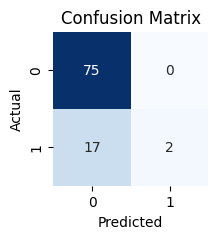

True negative:  75
False negative:  17
True positive:  2
False positive:  0
--------------------------------------
XGBoost cross validation accuracy:  [0.85106383 0.78723404 0.82978723 0.82978723 0.91489362 0.80851064
 0.87234043 0.74468085 0.85106383 0.89361702] ------> mean: 0.8382978723404255
--------------------------------------


In [131]:
xgb_classifier = XGBClassifier(objective='binary:logitraw')

xgb_model = xgb_classifier.fit(data_train,target_train)

predXGB = xgb_model.fit(data_train,target_train).predict(data_test)

results['XGBoost']['basic'] = score(target_test, predXGB, "XGBoost")
results['XGBoost']['cross'] =  cv_results("XGBoost", xgb_classifier,data_features, target, kfold)



### Rezultati pre balansitanja dataseta:

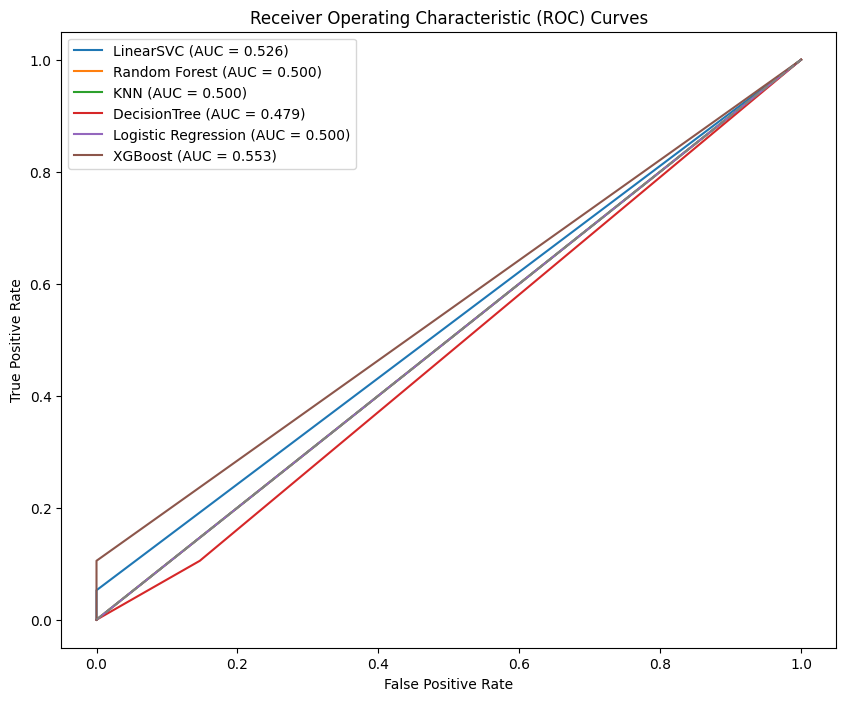

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.797872,0.797872,0.787234,0.808511,0.702128,0.819149
cross,0.848936,0.846809,0.844681,0.844681,0.840426,0.768085,0.838298


In [132]:
model_pred = [pred, rf_pred,predNN,predDT,pred_lr, predXGB]
model_names = ['LinearSVC','Random Forest','KNN', 'DecisionTree', 'Logistic Regression','XGBoost']

roc_plot(model_pred, model_names, target_test, "")

pd.DataFrame.from_dict(results)


## Balansiranje dataseta

Za balansiranje dataseta korisi se SMOTE koji vrsi oversempling klase sa manjim brojem instanci.

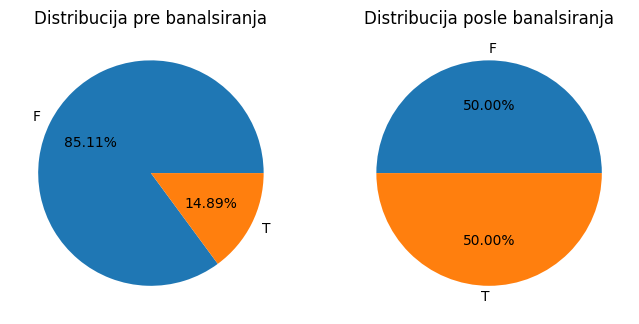

Risk1Yr_T
False    400
True      70
Name: count, dtype: int64
----------------------------
Risk1Yr_T
False    400
True     400
Name: count, dtype: int64


In [133]:
sm = SMOTE()

data_features_res, target_res = sm.fit_resample(data_features, target)

fig, axes = pyplot.subplots(1, 2, figsize=(8, 4))

axes[0].pie(target.value_counts(), labels=['F', 'T'],autopct='%1.2f%%')
axes[0].set_title('Distribucija pre banalsiranja')

axes[1].pie(target_res.value_counts(), labels=['F', 'T'], autopct='%1.2f%%')
axes[1].set_title('Distribucija posle banalsiranja')

pyplot.show()

print(target.value_counts())
print("----------------------------")
print(target_res.value_counts())



Podela balansiranih podataka na train i test:

In [134]:

data_train_balansed, data_test_balansed, target_train_balansed, target_test_balansed = train_test_split(data_features_res, target_res, test_size=0.2, random_state=42)

## Modeli posle balansiranja

LinearSVC
--------------------------------------
Accuracy : 0.7375
F1 Score:  0.746987951807229
Precision:  0.7560975609756098


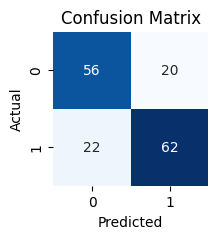

True negative:  56
False negative:  22
True positive:  62
False positive:  20
--------------------------------------
LinearSVC cross validation accuracy:  [0.7625 0.7625 0.7625 0.6875 0.7375 0.6875 0.8125 0.75   0.6625 0.7   ] ------> mean: 0.7324999999999999
--------------------------------------
Random Forest
--------------------------------------
Accuracy : 0.85
F1 Score:  0.8588235294117648
Precision:  0.8488372093023255


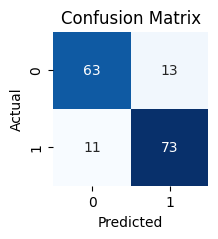

True negative:  63
False negative:  11
True positive:  73
False positive:  13
--------------------------------------
Random Forest cross validation accuracy:  [0.9125 0.9375 0.9    0.825  0.9    0.8625 0.925  0.8875 0.825  0.825 ] ------> mean: 0.8800000000000001
--------------------------------------
KNN
--------------------------------------
Accuracy : 0.775
F1 Score:  0.788235294117647
Precision:  0.7790697674418605


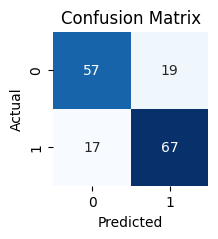

True negative:  57
False negative:  17
True positive:  67
False positive:  19
--------------------------------------
KNN cross validation accuracy:  [0.75   0.8375 0.85   0.7    0.85   0.7625 0.8375 0.7875 0.725  0.7875] ------> mean: 0.78875
--------------------------------------
DecisionTree
--------------------------------------
Accuracy : 0.7875
F1 Score:  0.7951807228915663
Precision:  0.8048780487804879


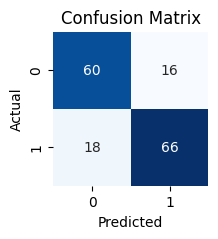

True negative:  60
False negative:  18
True positive:  66
False positive:  16
--------------------------------------
DecisionTree cross validation accuracy:  [0.8125 0.8375 0.8875 0.775  0.85   0.8    0.725  0.825  0.825  0.7875] ------> mean: 0.8125
--------------------------------------
 BernoulliNB
--------------------------------------
Accuracy : 0.7625
F1 Score:  0.7654320987654322
Precision:  0.7948717948717948


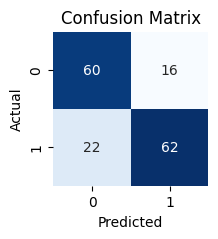

True negative:  60
False negative:  22
True positive:  62
False positive:  16
--------------------------------------
BernoulliNB cross validation accuracy:  [0.725  0.7875 0.675  0.7125 0.7375 0.7    0.75   0.6875 0.6125 0.6625] ------> mean: 0.705
--------------------------------------
Logistic Regression
--------------------------------------
Accuracy : 0.74375
F1 Score:  0.757396449704142
Precision:  0.7529411764705882


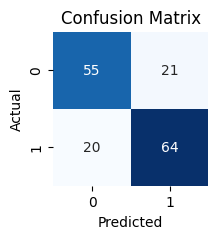

True negative:  55
False negative:  20
True positive:  64
False positive:  21
--------------------------------------
Logistic Regression cross validation accuracy:  [0.7625 0.7625 0.7625 0.6875 0.6875 0.7    0.8125 0.7125 0.6625 0.7   ] ------> mean: 0.7249999999999999
--------------------------------------
XGBoost
--------------------------------------
Accuracy : 0.825
F1 Score:  0.8333333333333334
Precision:  0.8333333333333334


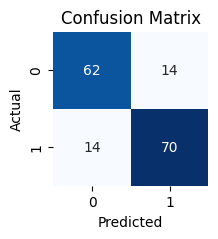

True negative:  62
False negative:  14
True positive:  70
False positive:  14
--------------------------------------
XGBoost cross validation accuracy:  [0.9375 0.9    0.8875 0.8625 0.8625 0.85   0.9    0.85   0.8375 0.825 ] ------> mean: 0.8712500000000001
--------------------------------------


In [135]:
pred = svc_model.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['LinearSVC']['balanced'] =score(target_test_balansed, pred, "LinearSVC")
results['LinearSVC']['balanced-cross'] =  cv_results("LinearSVC", svc_model,data_features_res, target_res, kfold)

rf_pred = rf_classifier.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['Random Forest']['balanced'] =score(target_test_balansed, rf_pred, "Random Forest")
results['Random Forest']['balanced-cross'] =  cv_results("Random Forest", rf_classifier,data_features_res, target_res, kfold)

predNN = nearest_neighbors.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['KNN']['balanced'] =score(target_test_balansed, predNN, "KNN")
results['KNN']['balanced-cross'] =  cv_results("KNN", nearest_neighbors,data_features_res, target_res, kfold)

predDT = decisionTree.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['DecisionTree']['balanced'] =score(target_test_balansed, predDT, "DecisionTree")
results['DecisionTree']['balanced-cross'] =  cv_results("DecisionTree", decisionTree,data_features_res, target_res, kfold)

BernoulliNB = nb_classifer.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['BernoulliNB']['balanced'] =score(target_test_balansed, BernoulliNB, " BernoulliNB")
results['BernoulliNB']['balanced-cross'] =  cv_results("BernoulliNB", nb_classifer,data_features_res, target_res, kfold)

pred_lr = logistic_regression.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['Logistic Regression']['balanced'] =score(target_test_balansed, pred_lr, "Logistic Regression")
results['Logistic Regression']['balanced-cross'] =  cv_results("Logistic Regression", logistic_regression,data_features_res, target_res, kfold)

predXGB = xgb_model.fit(data_train_balansed, target_train_balansed).predict(data_test_balansed)
results['XGBoost']['balanced'] =score(target_test_balansed, predXGB, "XGBoost")
results['XGBoost']['balanced-cross'] =  cv_results("XGBoost", xgb_classifier,data_features_res, target_res, kfold)




### Rezultati posle balansiranja

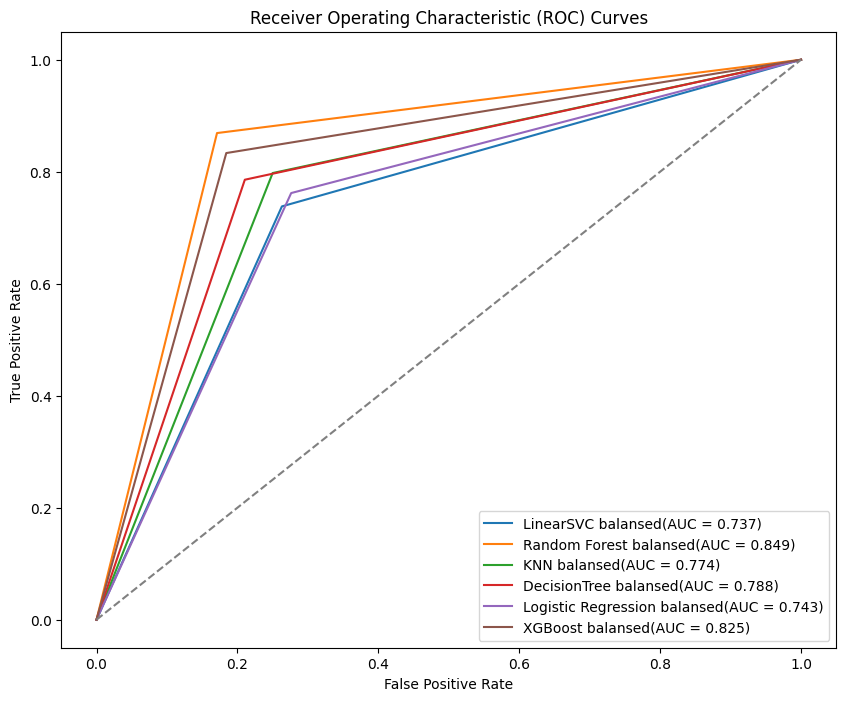

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.797872,0.797872,0.787234,0.808511,0.702128,0.819149
cross,0.848936,0.846809,0.844681,0.844681,0.840426,0.768085,0.838298
balanced,0.775000,0.850000,0.743750,0.737500,0.762500,0.787500,0.825000
balanced-cross,0.788750,0.880000,0.725000,0.732500,0.705000,0.812500,0.871250


In [136]:
model_pred = [pred, rf_pred,predNN,predDT,pred_lr, predXGB]
roc_plot(model_pred, model_names, target_test_balansed, "balansed")
pd.DataFrame(results)

## Hiperparametri

In [137]:
def findParameters(model, hyperparameters, model_name):
    grid_search_cv = GridSearchCV(model, hyperparameters, verbose=2, n_jobs=-1, scoring="accuracy")
    hparams_model = grid_search_cv.fit(data_train_balansed, target_train_balansed)
    hparams_pred = hparams_model.predict(data_test_balansed)
    
    print("Best parameters: ",hparams_model.best_params_)
    print("Best score: ",hparams_model.best_score_)

    results[model_name]['hyperparams'] = score(target_test_balansed, hparams_pred, model_name)

    return hparams_pred

### K-Nearest Neighbors

Fitting 5 folds for each of 114 candidates, totalling 570 fits


Best parameters:  {'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
Best score:  0.8609375
KNN
--------------------------------------
Accuracy : 0.8125
F1 Score:  0.8314606741573034
Precision:  0.7872340425531915


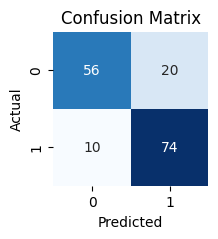

True negative:  56
False negative:  10
True positive:  74
False positive:  20
--------------------------------------


In [138]:
knn_model = KNeighborsClassifier()

knn_hyperparameters = { 'n_neighbors': list(range(2, 21)),
               'weights': ['uniform','distance'],
               'metric': ['minkowski','euclidean','manhattan']}

knn_pred = findParameters(knn_model, knn_hyperparameters, 'KNN')


### Hyperparameters of Random Forest Classifier:
1. max_depth: The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.
2. min_sample_split: Parameter that tells the decision tree in a random forest the minimum required number of observations in any given node to split it. Default = 2
3. max_leaf_nodes: This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.
4. min_samples_leaf: This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node. Default = 1
5. n_estimators: Number of trees in the forest.
6. max_sample: The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.
7. max_features: This resembles the number of maximum features provided to each tree in a random forest.
8. bootstrap: Method for sampling data points (with or without replacement). Default = True
9. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

Random Forest
--------------------------------------
Accuracy : 0.84375
F1 Score:  0.8520710059171598
Precision:  0.8470588235294118


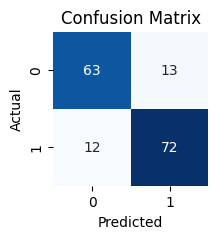

True negative:  63
False negative:  12
True positive:  72
False positive:  13
--------------------------------------


In [139]:

rf_classifier = RandomForestClassifier()

rf_hyperparameters = {
            'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 800, 1600],
    'criterion': ['gini', 'entropy'],
               }


# manje granice jer predugo traje
#{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 90}
# 0.8390625

# vreme 9min
# {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
# Best parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
# Best score:  0.8670526315789473

# vreme 26 min
# {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# Best parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# Best score:  0.8696842105263158
#findParameters(rf_classifier, rf_hyperparameters, 'random forest')

rf_classifier_hyp = RandomForestClassifier( bootstrap=False, criterion='gini', max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=200)
rf_model_hyp = rf_classifier_hyp.fit(data_train_balansed, target_train_balansed)
rf_pred_hyp = rf_model_hyp.predict(data_test_balansed)

results['Random Forest']['hyperparams'] = score(target_test_balansed, rf_pred_hyp, 'Random Forest')

`Best parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}`

### LinearSVC

In [ ]:
svc_model = SVC()
# degrees = [0, 1, 2, 3, 4, 5, 6]
svc_hyperparameters = {
            'C': [0.0001, 1, 10], 
            'gamma': [0.1, 1, 10],
            'kernel': ['rbf','poly','sigmoid', 'linear']}

scv_pred = findParameters(svc_model, svc_hyperparameters, 'LinearSVC')

`Best parameters: {C=10, gamma=0.1,probability=True,kernel='rbf}`

### Logistic Regression

In [ ]:
lr_model = LogisticRegression()

lr_hyperparameters = {
    'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'penalty':  [None, "l1", "l2", "elasticnet"],
    'C': [100, 10, 1.0, 0.1, 0.01],
                      }

lr_pred = findParameters(lr_model, lr_hyperparameters, 'Logistic Regression')

`Best parameters:  {'C': 100, 'penalty': None, 'solver': 'sag'}`


### BernoulliNB

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'alpha': 1.0, 'binarize': 0}
Best score:  0.7
BernoulliNB
--------------------------------------
Accuracy : 0.7625
F1 Score:  0.7654320987654322
Precision:  0.7948717948717948


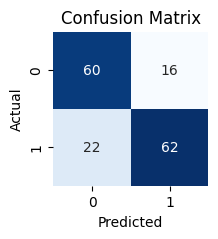

True negative:  60
False negative:  22
True positive:  62
False positive:  16
--------------------------------------


In [146]:
nb_model = BernoulliNB()

nb_hyperparameters = {
    "alpha": [0, 0.1, 1.0],
                      'binarize':[0, 5, 10]
                      }

nb_pred = findParameters(nb_model, nb_hyperparameters, 'BernoulliNB')

`Best parameters:  {'alpha': 0, 'binarize': 0}`


### DecisionTreeClassifier

criterion: string, optional (default=”gini”): The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.  
random_state: int, RandomState instance or None, optional (default=None)  
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.  
ccp_alphanon-negative float, default=0.0  
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


Best parameters:  {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3}
Best score:  0.790625
DecisionTree
--------------------------------------
Accuracy : 0.78125
F1 Score:  0.7852760736196319
Precision:  0.810126582278481


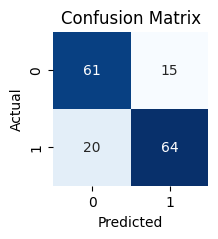

True negative:  61
False negative:  20
True positive:  64
False positive:  15
--------------------------------------


array([False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [147]:
dt_model = DecisionTreeClassifier()

dt_hyperparameters = {
    'max_depth': [2,  5, 8, 16],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,5),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0, 0.1, .01],
    'criterion': ["gini", "entropy"]
                      }

findParameters(dt_model, dt_hyperparameters, 'DecisionTree')

`{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 16, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}`

### XGBoost

XGBoost
--------------------------------------
Accuracy : 0.84375
F1 Score:  0.8520710059171598
Precision:  0.8470588235294118


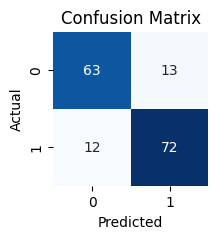

True negative:  63
False negative:  12
True positive:  72
False positive:  13
--------------------------------------


In [165]:
xgb_classifier = XGBClassifier()

xgb_hyperparameters = {
    'learning_rate': [0.01, 0.1, 0.2, 0.4],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200 , 400 , 600],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5]
}

# Best parameters:  {'learning_rate': 0.4, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 1.0}
# Best score:  0.8671875

# xgb_pred = findParameters(xgb_classifier, xgb_hyperparameters, 'XGBoost')
xgb_classifier = XGBClassifier(learning_rate = 0.4, max_depth=5, min_child_weight= 2, n_estimators= 200 , subsample=1.0 )
xgb_model_hyp = xgb_classifier.fit(data_train_balansed, target_train_balansed)
xgb_pred_hyp = xgb_model_hyp.predict(data_test_balansed)

results['XGBoost']['hyperparams'] = score(target_test_balansed, rf_pred_hyp, 'XGBoost')

`Best parameters:  {'learning_rate': 0.4, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 1.0}`

In [149]:
svc = SVC(C=10, gamma=0.1,probability=True,kernel='rbf')

decisionTree = DecisionTreeClassifier(ccp_alpha=0, criterion='gini', max_depth=16, min_samples_split=4, min_samples_leaf=1, random_state=0)

rf_classifier = RandomForestClassifier( bootstrap=False, criterion='gini', max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=200)

knn=KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

xgb_classifier = XGBClassifier(learning_rate = 0.4, max_depth=5, min_child_weight= 2, n_estimators= 200 , subsample=1.0 )


## Redukcija

### PCA

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

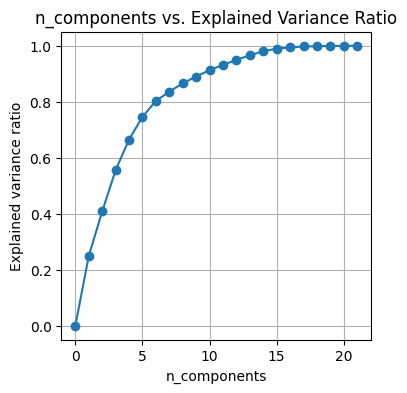

In [150]:
nums = np.arange(22)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(data_features_res)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

pyplot.figure(figsize=(4,4))
pyplot.grid()
pyplot.plot(nums,var_ratio,marker='o')
pyplot.xlabel('n_components')
pyplot.ylabel('Explained variance ratio')
pyplot.title('n_components vs. Explained Variance Ratio')


In [151]:
pca = PCA(n_components=0.95)
data_features_pca = pca.fit_transform(data_features_res)

data_train_pca, data_test_pca, target_train_pca, target_test_pca = train_test_split(data_features_pca, target_res, test_size=0.2, random_state=42)

rf_classifier.fit(data_train_pca, target_train_pca)
rf_pred = rf_classifier.predict(data_test_pca)
print("random forest accuracy after PCA:  ", (accuracy_score(target_test_pca, rf_pred)))

knn.fit(data_train_pca, target_train_pca)
predNN = knn.predict(data_test_pca)
print("knn accuracy after PCA:  ", (accuracy_score(target_test_pca, predNN)))

predDT = decisionTree.fit(data_train_pca, target_train_pca).predict(data_test_pca)
print("decision tree accuracy after PCA:  ", (accuracy_score(target_test_pca, predDT)))

xgb_model = xgb_model.fit(data_train_pca, target_train_pca)
predXGB = xgb_model.predict(data_test_pca)
print("XGBoost accuracy after PCA:  ", (accuracy_score(target_test_pca, predXGB)))

svc = svc.fit(data_train_pca, target_train_pca)
predSVC = svc.predict(data_test_pca)
print("SVC accuracy after PCA:  ", (accuracy_score(target_test_pca, predSVC)))

results['Random Forest']['pca'] =accuracy_score(target_test_pca, rf_pred)
results['KNN']['pca'] =accuracy_score(target_test_pca, predNN)
results['DecisionTree']['pca'] =accuracy_score(target_test_pca, predDT)
results['XGBoost']['pca'] =accuracy_score(target_test_pca, predXGB)
results['LinearSVC']['pca'] =accuracy_score(target_test_pca, predSVC)

random forest accuracy after PCA:   0.83125
knn accuracy after PCA:   0.8125
decision tree accuracy after PCA:   0.71875
XGBoost accuracy after PCA:   0.8375
SVC accuracy after PCA:   0.7875


In [152]:
pd.DataFrame(results)

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.797872,0.797872,0.787234,0.808511,0.702128,0.819149
cross,0.848936,0.846809,0.844681,0.844681,0.840426,0.768085,0.838298
balanced,0.775000,0.850000,0.743750,0.737500,0.762500,0.787500,0.825000
balanced-cross,0.788750,0.880000,0.725000,0.732500,0.705000,0.812500,0.871250
hyperparams,0.812500,0.843750,0.756250,NaN,0.762500,0.781250,NaN
pca,0.812500,0.831250,NaN,0.787500,NaN,0.718750,0.837500


### Random Forest Feature Importance 

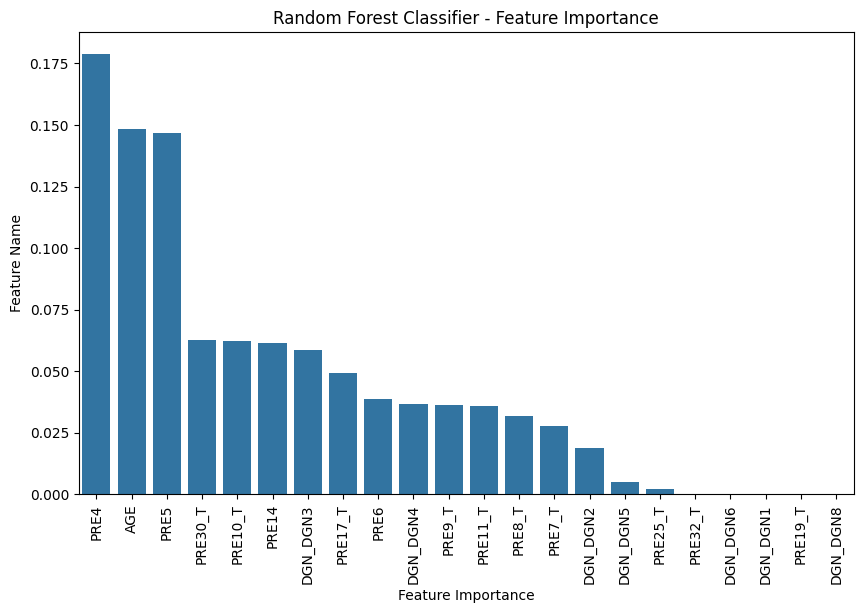

In [153]:
rf_model = rf_classifier.fit(data_train_balansed, target_train_balansed)

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': data_features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

pyplot.figure(figsize=(10, 6))
sns.barplot(y=importance_df['Importance'], x=importance_df['Feature'], orient="v")
pyplot.xticks(rotation=90)
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Feature Name")
pyplot.title("Random Forest Classifier - Feature Importance")
pyplot.show()


In [154]:

important_features_mask = importance_df.where(importance_df['Importance'] > 0.025).dropna().reset_index(drop=True)
important_features_mask = important_features_mask['Feature']

rfi_feature_data = data_features_res[important_features_mask]
rfi_feature_data

,PRE4,AGE,PRE5,PRE30_T,PRE10_T,PRE14,DGN_DGN3,PRE17_T,PRE6,DGN_DGN4,PRE9_T,PRE11_T,PRE8_T,PRE7_T
0,-0.461405,-0.291348,-0.204903,True,True,4,0,False,2,0,False,True,False,False
1,0.135975,-1.326113,-0.228722,True,False,2,1,False,1,0,False,False,False,False
2,-0.599262,-0.406322,-0.211708,True,True,1,1,False,2,0,False,False,False,False
3,0.457641,-0.981191,-0.130043,False,False,1,1,False,1,0,False,False,False,False
4,-0.966881,1.203311,-0.306984,True,True,1,1,False,3,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.768673,1.492034,-0.088623,True,True,3,0,False,1,0,False,False,True,False
796,-0.906132,-0.895833,-0.230591,True,True,2,0,False,1,0,False,False,False,False
797,0.259245,-1.447770,-0.190014,True,True,3,1,False,1,0,False,False,False,False
798,-0.714731,2.605629,-0.235175,True,True,2,0,True,2,0,True,False,True,False


In [155]:
rfi_data_train, rf_data_test_balansed, rf_target_train_balansed, rf_target_test_balansed = train_test_split(rfi_feature_data, target_res, test_size=0.2, random_state=42)

print("Original number of features:", data_train_balansed.shape[1])
print("Reduced number of features:", rfi_data_train.shape[1])

def rf_fi_score(model,modelName):
    modelTrained = model.fit(rfi_data_train, rf_target_train_balansed)
    prediction = modelTrained.predict(rf_data_test_balansed)
    print(f"Best {modelName} accuracy : ",accuracy_score(rf_target_test_balansed, prediction, normalize = True))
    results[modelName]['Random Forest Feature Importance'] = accuracy_score(rf_target_test_balansed, prediction, normalize = True)

rf_fi_score(svc,'LinearSVC')
rf_fi_score(decisionTree,"DecisionTree")
rf_fi_score(rf_classifier,"Random Forest")
rf_fi_score(knn,"KNN")
rf_fi_score(xgb_model, "XGBoost")


Original number of features: 22
Reduced number of features: 14
Best LinearSVC accuracy :  0.775
Best DecisionTree accuracy :  0.8125
Best Random Forest accuracy :  0.8625
Best KNN accuracy :  0.81875
Best XGBoost accuracy :  0.84375


### XGBoost Feature Importance

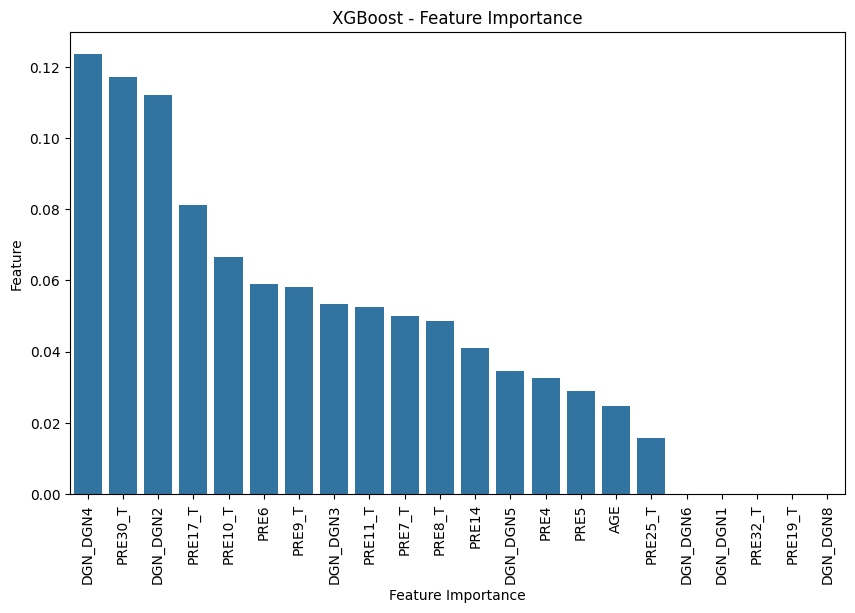

In [156]:
xgb_model = xgb_model.fit(data_train_balansed, target_train_balansed)

feature_importances = xgb_model.feature_importances_

importance_df = pd.DataFrame({'Feature': data_features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

pyplot.figure(figsize=(10, 6))
sns.barplot(y=importance_df['Importance'], x=importance_df['Feature'], orient="v")
pyplot.xticks(rotation=90)
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Feature")
pyplot.title("XGBoost - Feature Importance")
pyplot.show()


In [157]:

important_features_mask = importance_df.where(importance_df['Importance'] > 0.03).dropna().reset_index(drop=True)
important_features_mask = important_features_mask['Feature']

xgb_feature_data = data_features_res[important_features_mask]
xgb_feature_data

,DGN_DGN4,PRE30_T,DGN_DGN2,PRE17_T,PRE10_T,PRE6,PRE9_T,DGN_DGN3,PRE11_T,PRE7_T,PRE8_T,PRE14,DGN_DGN5,PRE4
0,0,True,1,False,True,2,False,0,True,False,False,4,0,-0.461405
1,0,True,0,False,False,1,False,1,False,False,False,2,0,0.135975
2,0,True,0,False,True,2,False,1,False,False,False,1,0,-0.599262
3,0,False,0,False,False,1,False,1,False,False,False,1,0,0.457641
4,0,True,0,False,True,3,False,1,True,False,True,1,0,-0.966881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,True,0,False,True,1,False,0,False,False,True,3,0,1.768673
796,0,True,0,False,True,1,False,0,False,False,False,2,0,-0.906132
797,0,True,0,False,True,1,False,1,False,False,False,3,0,0.259245
798,0,True,0,True,True,2,True,0,False,False,True,2,0,-0.714731


In [158]:
xgb_data_train, xgb_data_test_balansed, xgb_target_train_balansed, xgb_target_test_balansed = train_test_split(xgb_feature_data, target_res, test_size=0.2, random_state=42)

print("Original number of features:", data_train_balansed.shape[1])
print("Reduced number of features:", rfi_data_train.shape[1])

def xgb_fi_score(model,modelName):
    modelTrained = model.fit(xgb_data_train, xgb_target_train_balansed)
    prediction = modelTrained.predict(xgb_data_test_balansed)
    print(f"Best {modelName} accuracy : ",accuracy_score(xgb_target_test_balansed, prediction, normalize = True))
    results[modelName]['XGBoost Feature Importance'] = accuracy_score(xgb_target_test_balansed, prediction, normalize = True)

xgb_fi_score(svc,'LinearSVC')
xgb_fi_score(decisionTree,"DecisionTree")
xgb_fi_score(rf_classifier,"Random Forest")
xgb_fi_score(knn,"KNN")
xgb_fi_score(xgb_model, "XGBoost")



Original number of features: 22
Reduced number of features: 14
Best LinearSVC accuracy :  0.8
Best DecisionTree accuracy :  0.75625
Best Random Forest accuracy :  0.825
Best KNN accuracy :  0.79375
Best XGBoost accuracy :  0.775


### Variance thresholding
Variance thresholding (VT) is one of the most basic approaches to feature selection. It
is motivated by the idea that features with low variance are likely less interesting (and
useful) than features with high variance. 

In [159]:
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=.5)
data_train_VT = thresholder.fit_transform(data_train_balansed)
data_test_VT = thresholder.transform(data_test_balansed)

print("Original number of features:", data_train_balansed.shape[1])
print("Reduced number of features:", data_train_VT.shape[1])

def varianceScore(model,modelName):
    modelTrained = model.fit(data_train_VT,target_train_balansed)
    prediction = modelTrained.predict(data_test_VT)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test_balansed, prediction, normalize = True))
    results[modelName]['VarianceThreshold'] = accuracy_score(target_test_balansed, prediction, normalize = True)

varianceScore(svc,'LinearSVC')
varianceScore(decisionTree,"DecisionTree")
varianceScore(rf_classifier,"Random Forest")
varianceScore(knn,"KNN")
varianceScore(xgb_model, "XGBoost")


Original number of features: 22
Reduced number of features: 3
Best LinearSVC accuracy :  0.59375
Best DecisionTree accuracy :  0.63125
Best Random Forest accuracy :  0.73125
Best KNN accuracy :  0.65625
Best XGBoost accuracy :  0.725


### SelectPercentile

In [160]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif

f_classif_selector = SelectPercentile(f_classif, percentile=90)
data_features_selectP = f_classif_selector.fit_transform(data_features, target)

print("Original number of features:", data_train.shape[1])
print("Reduced number of features:", data_features_selectP.shape[1])

data_train_selectP,data_test_selectP,target_train_selectP,target_test_selectP = train_test_split(data_features_selectP,target,test_size=0.2,random_state=10)

def selectScore(model,modelName):
    modelTrained = model.fit(data_train_selectP,target_train_selectP)
    prediction = modelTrained.predict(data_test_selectP)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test_selectP, prediction, normalize = True))

selectScore(svc,'LinearSVC')
selectScore(decisionTree,"DecisionTree")
selectScore(rf_classifier,"Random Forest")
selectScore(knn,"KNN")
selectScore(xgb_model,"XGBoost")


Original number of features: 22
Reduced number of features: 19
Best LinearSVC accuracy :  0.7978723404255319
Best DecisionTree accuracy :  0.7659574468085106
Best Random Forest accuracy :  0.8085106382978723
Best KNN accuracy :  0.7446808510638298
Best XGBoost accuracy :  0.8191489361702128


### Laso

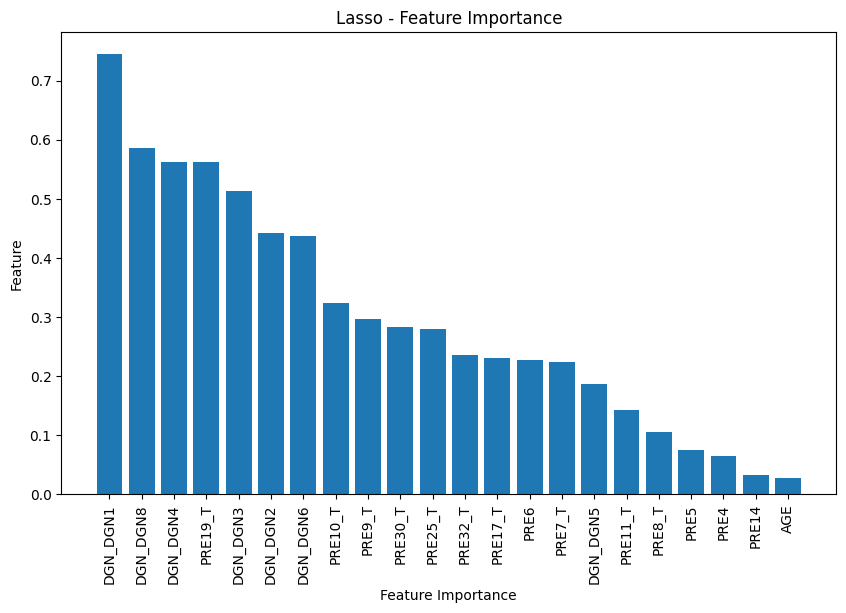

In [161]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.00001)
lasso.fit(data_train_balansed, target_train_balansed)

lasso_coef = np.abs(lasso.coef_)
pd_lasso = pd.DataFrame(lasso_coef, index=data_features.columns, columns=['coef'])
pd_lasso.sort_values(by='coef', ascending=False, inplace=True)

pyplot.figure(figsize=(10, 6))
pyplot.xticks(rotation=90)
pyplot.bar(pd_lasso.index, pd_lasso['coef'])
pyplot.xlabel("Feature Importance")
pyplot.ylabel("Feature")
pyplot.title("Lasso - Feature Importance")
pyplot.show()


In [162]:
selected_features = lasso_coef >= 0.1

data_train_Lasso = pd.DataFrame(data_train_balansed, columns=data_features.columns)
data_train_Lasso = data_train_Lasso.loc[:, selected_features]

data_test_Lasso = pd.DataFrame(data_test_balansed, columns=data_features.columns)
data_test_Lasso = data_test_Lasso.loc[:, selected_features]

print("New number of features: ", data_train_Lasso.shape[1])

def lassoScore(estimator, modelName):
    model = estimator.fit(data_train_Lasso, target_train_balansed)
    prediction = model.predict(data_test_Lasso)
    print(f"Best {modelName} accuracy : ", accuracy_score(target_test_balansed, prediction, normalize=True))
    results[modelName]['Lasso'] = accuracy_score(target_test_balansed, prediction, normalize=True)

lassoScore(svc,'LinearSVC')
lassoScore(decisionTree,"DecisionTree")
lassoScore(rf_classifier,"Random Forest")
lassoScore(knn,"KNN")
lassoScore(xgb_model,"XGBoost")


New number of features:  18
Best LinearSVC accuracy :  0.725
Best DecisionTree accuracy :  0.74375
Best Random Forest accuracy :  0.75
Best KNN accuracy :  0.69375
Best XGBoost accuracy :  0.71875


## Rezultati

In [166]:
pd.DataFrame.from_dict(results)

,KNN,Random Forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree,XGBoost
basic,0.797872,0.797872,0.797872,0.787234,0.808511,0.702128,0.819149
cross,0.848936,0.846809,0.844681,0.844681,0.840426,0.768085,0.838298
balanced,0.775000,0.850000,0.743750,0.737500,0.762500,0.787500,0.825000
balanced-cross,0.788750,0.880000,0.725000,0.732500,0.705000,0.812500,0.871250
hyperparams,0.812500,0.843750,0.756250,NaN,0.762500,0.781250,0.843750
pca,0.812500,0.831250,NaN,0.787500,NaN,0.718750,0.837500
Random Forest Feature Importance,0.818750,0.862500,NaN,0.775000,NaN,0.812500,0.843750
XGBoost Feature Importance,0.793750,0.825000,NaN,0.800000,NaN,0.756250,0.775000
VarianceThreshold,0.656250,0.731250,NaN,0.593750,NaN,0.631250,0.725000
Lasso,0.693750,0.750000,NaN,0.725000,NaN,0.743750,0.718750
